In [1]:
import sympy as smp

r1, r2 = smp.symbols('r1 r2 ', real=True, positive=True)
theta = smp.symbols('theta')
theta1, phi1 = smp.symbols('theta_1 phi_1')
theta2, phi2 = smp.symbols('theta_2 phi_2')

x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'x1')(r1, theta1, phi1)
y2 = smp.Function(r'x2')(r2, theta2, phi2)

z1 = smp.Function(r'x1')(r1, theta1)
z2 = smp.Function(r'x2')(r2, theta2)

Psi = smp.Function('Psi')(r1, r2)
V = smp.Function('V')(r1, r2)
absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))

V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)
Laplacian = (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) + (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) + (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) + (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) + (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) + (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

In [2]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

In [3]:
Phi_1 = smp.Function('\Phi_1')(r1, r2)
Phi_2 = smp.Function('\Phi_2')(r1, r2)
Phi_3 = smp.Function('\Phi_3')(r1, r2)
Phi_4 = smp.Function('\Phi_4')(r1, r2)
Phi_5 = smp.Function('\Phi_5')(r1, r2)
Phi_6 = smp.Function('\Phi_6')(r1, r2)
Phi_7 = smp.Function('\Phi_7')(r1, r2)

In [4]:
Phi_1 = smp.exp(-2 * (r1 + r2))
Phi_2 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)
Phi_3 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)
Phi_4 = smp.exp(-2 * (r1 + r2)) * r1 * r2
Phi_5 = smp.exp(-2 * (r1 + r2)) * (r1**2 + r2**2)
Phi_6 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)**2
Phi_7 = smp.exp(-2 * (r1 + r2)) * (r1 + r2) * (absolute_diff)

In [5]:
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [6]:
Phi_1 = Phi_1.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_2 = Phi_2.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_3 = Phi_3.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_4 = Phi_4.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_5 = Phi_5.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_6 = Phi_6.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_7 = Phi_7.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)

In [7]:
V_eff = V_eff.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Hamiltonian = Laplacian + V * Psi

In [8]:
H_Phi_1 = Hamiltonian.subs({Psi: Phi_1, V:V_eff}).simplify()

In [9]:
H_Phi_2 = Hamiltonian.subs({Psi: Phi_2, V:V_eff}).simplify()

In [10]:
H_Phi_3 = Hamiltonian.subs({Psi: Phi_3, V:V_eff}).simplify()

In [11]:
H_Phi_4 = Hamiltonian.subs({Psi: Phi_4, V:V_eff}).simplify()

In [12]:
H_Phi_5 = Hamiltonian.subs({Psi: Phi_5, V:V_eff}).simplify()

In [15]:
H_Phi_6 = Hamiltonian.subs({Psi: Phi_6, V:V_eff}).simplify()

In [16]:
H_Phi_7 = Hamiltonian.subs({Psi: Phi_7, V:V_eff}).simplify()

In [17]:
f_11 = (Phi_1 * H_Phi_1) * r1**2 * r2**2
f_11 = f_11.simplify()
f_11

r1*r2*(8*r1*r2 + r1*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1 - 6*r2)*exp(-4*r1 - 4*r2)

In [18]:
f_22 = (Phi_2 * H_Phi_2) * r1**2 * r2**2
f_22 = f_22.simplify()
f_22

r1*r2*(r1 + r2)*(8*r1**2*r2 + r1**2*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1**2 + 8*r1*r2**2 + r1*r2**2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 20*r1*r2 + 2*r1 - 6*r2**2 + 2*r2)*exp(-4*r1 - 4*r2)

In [19]:
f_33 = (Phi_3 * H_Phi_3) * r1**2 * r2**2
f_33 = f_33.simplify()
f_33

r1*r2*(-r1*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r2*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2 - (r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)**2 + 4*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2) + 4*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)**2) + 2*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2) + 4*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)**2) - r2*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)

In [20]:
f_44 = (Phi_4 * H_Phi_4) * r1**2 * r2**2
f_44 = f_44.simplify()
f_44

r1**2*r2**2*(8*r1**2*r2**2 + r1**2*r2**2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 10*r1**2*r2 + 2*r1**2 - 10*r1*r2**2 + 2*r2**2)*exp(-4*r1 - 4*r2)

In [21]:
f_55 = (Phi_5 * H_Phi_5) * r1**2 * r2**2
f_55 = f_55.simplify()
f_55

r1*r2*(r1**2 + r2**2)*(8*r1**3*r2 + r1**3*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1**3 - 14*r1**2*r2 + 8*r1*r2**3 + r1*r2**3/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 14*r1*r2**2 + 12*r1*r2 - 6*r2**3)*exp(-4*r1 - 4*r2)

In [22]:
f_66 = (Phi_6 * H_Phi_6) * r1**2 * r2**2
f_66 = f_66.simplify()
f_66

r1*r2*sqrt(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-2*r1*sqrt(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-2*r1**2*r2 + 2*r1**2 + 4*r1*r2**2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + 4*r1*r2**2*cos(theta_1)*cos(theta_2) - 8*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 8*r1*r2*cos(theta_1)*cos(theta_2) + 2*r1*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + 2*r1*cos(theta_1)*cos(theta_2) - 2*r2**3 + 6*r2**2 - 3*r2) + 2*r2*sqrt(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(2*r1**3 - 4*r1**2*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 4*r1**2*r2*cos(theta_1)*cos(theta_2) - 6*r1**2 + 2*r1*r2**2 + 8*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + 8*r1*r2*cos(theta_1)*cos(theta_2) + 3*r1 - 2*r2**2 - 2*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r2*cos(theta_1)*cos(theta_2)) - (r1**2 - 2*r1*r2

In [23]:
f_77 = (Phi_7 * H_Phi_7) * r1**2 * r2**2
f_77 = f_77.simplify()
f_77

-r1*r2*(r1 + r2)*(r1*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r2*(-r1**2*(r1 + r2)*(sin(theta_1)**2*sin(theta_2)**2*cos(phi_1 - phi_2)**2 + 2*sin(theta_1)*sin(theta_2)*cos(theta_1)*cos(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)**2*cos(theta_2)**2 - 1) + 4*(r1 + r2 - 1)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)**2 + 2*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2 + 2*(r1 + r2)*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2))) + 2*(r1 + r2)*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2) + 2*(2*r1 + 2*r2 - 1)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi

In [24]:
f_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_11)
f_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_22)
f_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_33)
f_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_44)
f_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_55)
f_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_66)
f_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_77)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

r1 = np.linspace(0, 0.529, 100)
r2 = np.linspace(0, 0.529, 100)

theta1 = np.linspace(0, np.pi, 100)
theta2 = np.linspace(0, np.pi, 100)

phi1 = np.linspace(0, 2*np.pi, 100)
phi2 = np.linspace(0, 2*np.pi, 100)

R1, R2 = np.meshgrid(r1, r2)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
Phi1, Phi2 = np.meshgrid(phi1, phi2)

In [26]:
F_11_3d = f_11_f(R1,Theta1, Phi1, R2, Theta2, Phi2)
F_22_3d = f_22_f(R1,Theta1, Phi1, R2, Theta2, Phi2)
F_33_3d = f_33_f(R1,Theta1, Phi1, R2, Theta2, Phi2)
F_44_3d = f_44_f(R1,Theta1, Phi1, R2, Theta2, Phi2)
F_55_3d = f_55_f(R1,Theta1, Phi1, R2, Theta2, Phi2)
F_66_3d = f_66_f(R1,Theta1, Phi1, R2, Theta2, Phi2)
F_77_3d = f_77_f(R1,Theta1, Phi1, R2, Theta2, Phi2)

## These will be 2 dimensional matrix

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return r1*r2*(8*r1*r2 + r1*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1 - 6*r2)*exp(-4*r1 - 4*r2)
<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in divide
  return r1*r2*(8*r1*r2 + r1*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1 - 6*r2)*exp(-4*r1 - 4*r2)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in divide
  return r1*r2*(8*r1*r2 + r1*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1 - 6*r2)*exp(-4*r1 - 4*r2)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return r1*r2*(r1 + r2)*(8*r1**2*r2 + r1**2*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1**

In [27]:
F_11_2d = f_11_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_22_2d = f_22_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_33_2d = f_33_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_44_2d = f_44_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_55_2d = f_55_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_66_2d = f_66_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_77_2d = f_77_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)

## These are arrays of shape (100,)

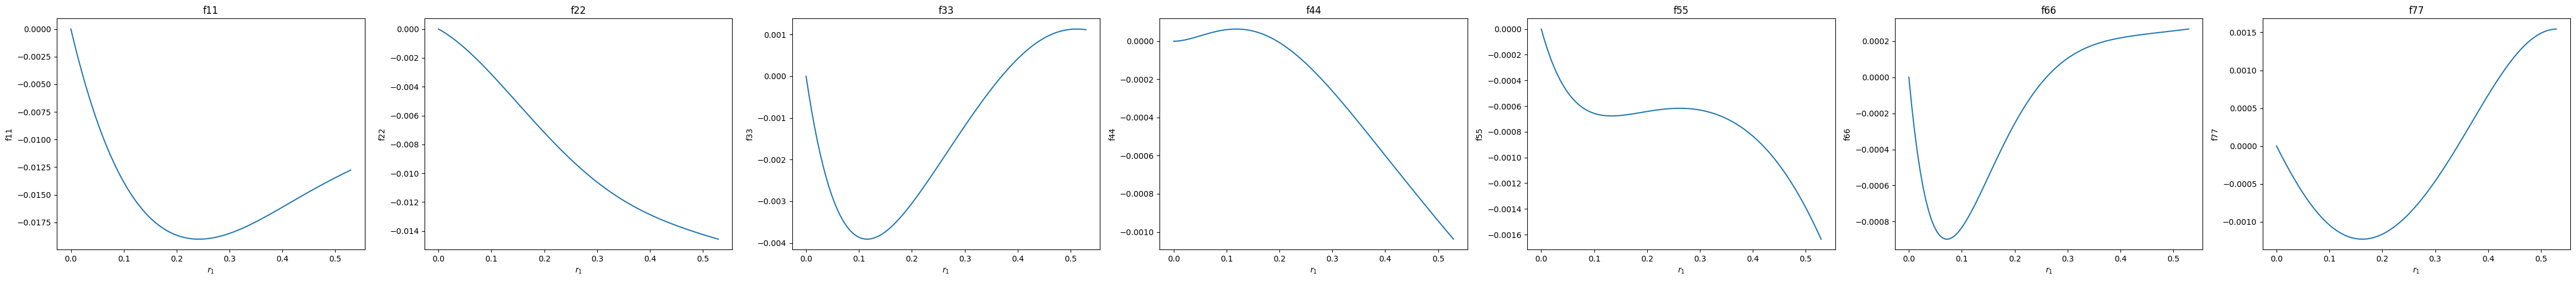

In [30]:
fig, axes = plt.subplots(1,7 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i])
    ax.set_xlabel('$r_1$')
    ax.set_ylabel(titles[i])
    ax.set_title(titles[i])

# Adjust layout
plt.tight_layout()

# plt.savefig('plot.jpg')
# Show the plots
plt.show()

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


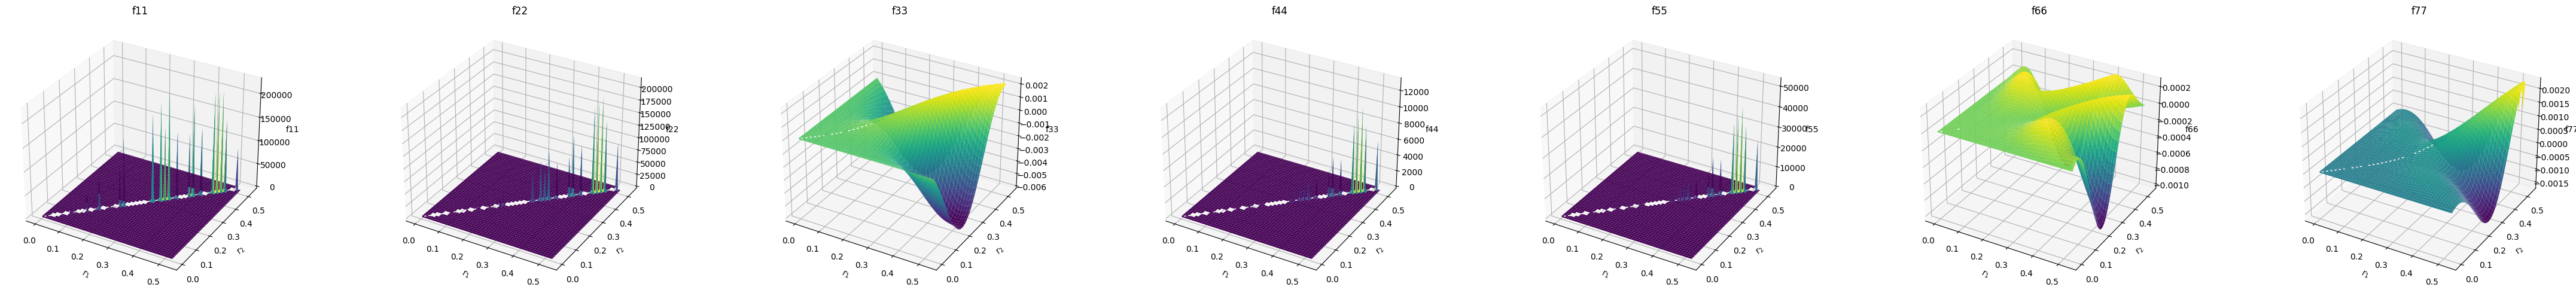

In [31]:
fig, axes = plt.subplots(1,7 ,figsize=(45,5), subplot_kw ={'projection': '3d'})

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_3d, F_22_3d, F_33_3d, F_44_3d, F_55_3d, F_66_3d, F_77_3d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot_surface(R1, R2, functions[i], cmap = 'viridis')
    ax.set_xlabel('$r_1$')
    ax.set_ylabel('$r_2$')
    ax.set_zlabel(titles[i])
    ax.set_title(titles[i])

# Adjust layout
plt.tight_layout()

# plt.savefig('plot.jpg')
# Show the plots
plt.show()

In [32]:
def f_over_p(F , p):
  return F/p

## First Approach

The primary goal is to optimize a set of coefficients for a linear combination of functions. The primary purpose is to adjust these coefficients such that the variance of the ratio $f_{ii}/p $ is minimized for all i. The coefficients $c_i$
are defined as trainable variables. These coefficients are initialized randomly within a small range to ensure stability at the beginning of training. The sampling function p is defined as a linear combination of the functions $f_{ii}$ weighted by the coefficients $c_i$.The custom loss function calculates the variance of the ratio $f_{ii}/p$ for each $f_{ii}$ and sums these variances.

The optimizer (here Stochastic Gradient Descent, i.e SGD) is used to minimize the loss function by adjusting the coefficients. Gradient clipping is applied to prevent gradients from becoming too large, which helps avoid numerical instability. The optimizer updates the coefficients based on the clipped gradients. The training loop runs for a specified number of epochs (1000 in this case). After training, the optimized coefficients are printed.

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# Sample data
f = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d]

# Define trainable coefficients
coefficients = tf.Variable(np.random.uniform(-1, 1, size=(7,)), dtype=tf.float32) # This is responsible for randomly initializing coefficients between -1 to 1.

Every time I run the above code it initialize with different combination of coefficients. This somehow is changing the best coefficients meaning every time I start with new random coefficients, finally I get new combination of best coefficients. This variability is inherent in many machine learning and optimization problems where the starting point can influence the final outcome, especially if the optimization landscape has multiple local minima. The possibility to find the global minimum, meaning, the best possible coefficients that gives minimum loss function, will be very difficult.

In [34]:
coefficients

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([-0.86415803, -0.52322906,  0.4565628 , -0.69723266,  0.65086955,
        0.67635345, -0.77489626], dtype=float32)>

In [35]:
# Define the sampling function p
def sampling_function(coefficients, f):
    p = sum(coefficients[i] * f[i] for i in range(7))
    return p


# Define the custom loss function
def variance_loss(f, p):
    loss = 0
    for i in range(7):
        ratio = f[i] / (p + 1e-6) # f/p will be an array of 100 elements

        # Filter out nan and inf values from the array
        mask_f_ii_p = tf.math.logical_not(tf.math.is_nan(ratio)) & tf.math.logical_not(tf.math.is_inf(ratio))
        ratio_new = tf.boolean_mask(ratio, mask_f_ii_p)

        variance = tf.math.reduce_variance(ratio_new) # Gives the variance of the new array
        loss += variance

    return loss

In [36]:
# Optimizer
# optimizer = Adam(learning_rate=0.01)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum = 0.9)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step():
    with tf.GradientTape() as tape:
        p = sampling_function(coefficients, f)
        loss = variance_loss(f, p)
    gradients = tape.gradient(loss, [coefficients])
    clipped_gradients = [tf.clip_by_value(grad, -1.0, 1.0) for grad in gradients]
    optimizer.apply_gradients(zip(gradients, [coefficients]))
    return loss

In [37]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss = train_step()
    if epoch % 100 == 0:

      print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 0.14202697575092316
Epoch 100, Loss: 0.07804334163665771
Epoch 200, Loss: 0.06106631085276604
Epoch 300, Loss: 0.05211612582206726
Epoch 400, Loss: 0.04632161185145378
Epoch 500, Loss: 0.0421610102057457
Epoch 600, Loss: 0.03897933289408684
Epoch 700, Loss: 0.03644055500626564
Epoch 800, Loss: 0.034351546317338943
Epoch 900, Loss: 0.03259216621518135


In [38]:
# Best coefficients
best_coefficients = coefficients.numpy()
print("Best coefficients:", best_coefficients)

Best coefficients: [-1.6352433  -0.756979    0.24043962 -0.70408535  0.5993981   0.6107415
 -0.8080507 ]


In [39]:
p = best_coefficients[0] * F_11_2d + best_coefficients[1] * F_22_2d + best_coefficients[2] * F_33_2d + best_coefficients[3]  * F_44_2d + best_coefficients[4] * F_55_2d + best_coefficients[5] * F_66_2d + best_coefficients[6] * F_77_2d
## An array of 100 elements

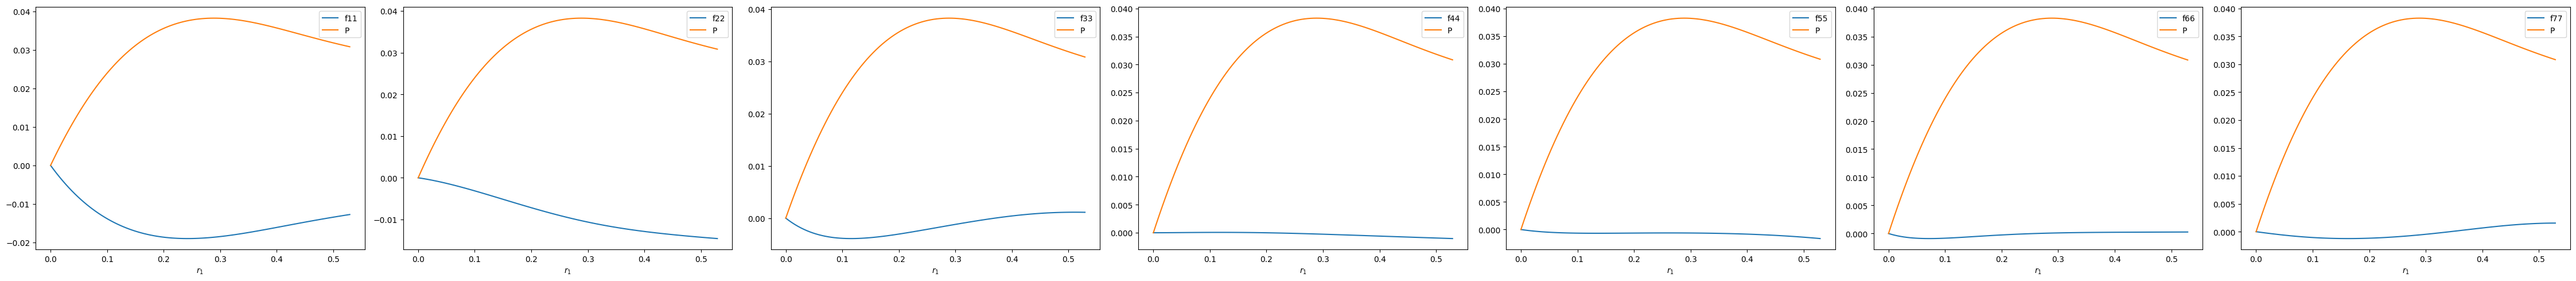

In [41]:
fig, axes = plt.subplots(1,7 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p, label='P')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# plt.savefig('plot.jpg')
# Show the plots
plt.show()

## Second Approach

We initially consider 7 arrays, each array has 100 values that lies between [-1,1]. After that we take any random value from each array and so we have 7 random numbers (each taken from those 7 arrays). We consider those as the 7 coefficients. We repeat this 100 times (random selection of values from 7 arrays). Hence we now have hundreds of a set of 7 numbers where each set will be the coefficients that we defined in P. We also find Sampling function P corresponding to every set of 7 numbers. For each set of 7 numbers, we get Sampling function P which will be an array of 100 elements ($ P = \sum c_if_{ii}$, where $f_{ii}$ is an array of 100 elements since r1 is an array of 100 elements and rest parameters were constant). Since we have hundreds of a set of 7 numbers, we get hundred sampling function P where each single P is an array of 100 elements.

For any Machine Learning problem, we require certain number of features of the data and corresponding to every feature, we have the labels. The work of the ML algorithm is to predict the label corresponding to the given set of features given as an input.

Here the set of 7 coefficients are considered as features. So we have 7 features in total and we have hundred numbers of samples. So the shape of the feature matrix is (100,7) (i.e 100 rows and 7 columns). The label corresponding to a given sample is the Sampling function P where P is an array of 100 elements. We later splitted the dataset into 70% and 30% where 70% of the data is used for training purpose. The rest 30% is used for testing. I used Random Forest and Neural Network to train the model.

For every label (i.e sampling function P), I found $f_{ii}/P$ for all i = 1,...,7. The nan values and $∞$ values were removed from $f_{ii}/P$ ($f_{ii}/P$ again will be an array of 100 elements) and then the variance was found for $f_{ii}/P$ for all P (100 labels) and for all i. The minimum from all variance was found (for each $f_{ii}$) and the index corresponding to that will be the index of the feature matrix. From this, we find the best coefficients.

The problem I later realized with this approach is that, the set of coefficients for which $ f_{ii}/P $ will be minimum is different for different i. Also at the beginning the coefficients taken were random from those 7 arrays. Hence every time we run the code again, we get different feature matrix and hence different sets of coefficients.

In [42]:
Coeff_1, Coeff_2, Coeff_3, Coeff_4, Coeff_5, Coeff_6, Coeff_7 = smp.symbols('C1 C2 C3 C4 C5 C6 C7')

p = Coeff_1 * f_11 + Coeff_2 * f_22 + Coeff_3 * f_33 + Coeff_4 * f_44 + Coeff_5 * f_55 + Coeff_6 * f_66 + Coeff_7 * f_77

In [43]:
Coeff = [np.linspace(-1,1,100) for _ in range(7)]

In [44]:
Coeff = np.array(Coeff)

In [46]:
## This function gives Coeff_1,...,Coeff_7 (arrays of length 100 where each element was randomly chosen from those 7 arrays defined above) and the sampling function P_2d
## corresponding to the set of 7 coefficients. We get hundreds of P_2d where individual P_2d is an array of size 100. So shape of P_2d is (100,100).


def F_Coeff(Coeff):

  P_2d = []
  C_1 = []
  C_2 = []
  C_3 = []
  C_4 = []
  C_5 = []
  C_6 = []
  C_7 = []

  for _ in range(100):

        c0 = np.random.choice(Coeff[0])
        c1 = np.random.choice(Coeff[1])
        c2 = np.random.choice(Coeff[2])
        c3 = np.random.choice(Coeff[3])
        c4 = np.random.choice(Coeff[4])
        c5 = np.random.choice(Coeff[5])
        c6 = np.random.choice(Coeff[6])
        P = c0 * F_11_2d + c1 * F_22_2d + c2 * F_33_2d + c3 * F_44_2d + c4 * F_55_2d + c5 * F_66_2d + c6 * F_77_2d

        P_2d.append(P)
        C_1.append(c0)
        C_2.append(c1)
        C_3.append(c2)
        C_4.append(c3)
        C_5.append(c4)
        C_6.append(c5)
        C_7.append(c6)

  C_1 = np.array(C_1)
  C_2 = np.array(C_2)
  C_3 = np.array(C_3)
  C_4 = np.array(C_4)
  C_5 = np.array(C_5)
  C_6 = np.array(C_6)
  C_7 = np.array(C_7)
  P_2d = np.array(P_2d)

  return C_1, C_2, C_3, C_4, C_5, C_6, C_7, P_2d

In [47]:
Coeff_1, Coeff_2, Coeff_3, Coeff_4, Coeff_5, Coeff_6, Coeff_7, P_2d = F_Coeff(Coeff)

In [48]:
P_2d.shape # There are hundred sampling function P and each P is an array of 100 elements. So shape of P here is (100,100)

(100, 100)

In [49]:
def f_ii_over_p(F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, P_2d):

  f_11_over_p = []
  f_22_over_p = []
  f_33_over_p = []
  f_44_over_p = []
  f_55_over_p = []
  f_66_over_p = []
  f_77_over_p = []

  for i in range(100):
    f11_over_p = F_11_2d/P_2d[i]
    f22_over_p = F_22_2d/P_2d[i]
    f33_over_p = F_33_2d/P_2d[i]
    f44_over_p = F_44_2d/P_2d[i]
    f55_over_p = F_55_2d/P_2d[i]
    f66_over_p = F_66_2d/P_2d[i]
    f77_over_p = F_77_2d/P_2d[i]

    f_11_over_p.append(f11_over_p)
    f_22_over_p.append(f22_over_p)
    f_33_over_p.append(f33_over_p)
    f_44_over_p.append(f44_over_p)
    f_55_over_p.append(f55_over_p)
    f_66_over_p.append(f66_over_p)
    f_77_over_p.append(f77_over_p)

  f_11_over_p = np.array(f_11_over_p)
  f_22_over_p = np.array(f_22_over_p)
  f_33_over_p = np.array(f_33_over_p)
  f_44_over_p = np.array(f_44_over_p)
  f_55_over_p = np.array(f_55_over_p)
  f_66_over_p = np.array(f_66_over_p)
  f_77_over_p = np.array(f_77_over_p)

  return f_11_over_p, f_22_over_p, f_33_over_p, f_44_over_p, f_55_over_p, f_66_over_p, f_77_over_p

In [50]:
F_11_over_P , F_22_over_P, F_33_over_P, F_44_over_P, F_55_over_P, F_66_over_P, F_77_over_P = f_ii_over_p(F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, P_2d)

<ipython-input-49-a2ae9f1c5429>:12: RuntimeWarning: invalid value encountered in divide
  f11_over_p = F_11_2d/P_2d[i]
<ipython-input-49-a2ae9f1c5429>:13: RuntimeWarning: invalid value encountered in divide
  f22_over_p = F_22_2d/P_2d[i]
<ipython-input-49-a2ae9f1c5429>:14: RuntimeWarning: invalid value encountered in divide
  f33_over_p = F_33_2d/P_2d[i]
<ipython-input-49-a2ae9f1c5429>:15: RuntimeWarning: invalid value encountered in divide
  f44_over_p = F_44_2d/P_2d[i]
<ipython-input-49-a2ae9f1c5429>:16: RuntimeWarning: invalid value encountered in divide
  f55_over_p = F_55_2d/P_2d[i]
<ipython-input-49-a2ae9f1c5429>:17: RuntimeWarning: invalid value encountered in divide
  f66_over_p = F_66_2d/P_2d[i]
<ipython-input-49-a2ae9f1c5429>:18: RuntimeWarning: invalid value encountered in divide
  f77_over_p = F_77_2d/P_2d[i]


In [51]:
print(F_11_over_P.shape)

"""
Here F_11/P is calculated for every 100 sampling function P. Each row depicts different P and since every sampling function P (and also f_ii) is an array of 100 elements,
there are 100 columns. Hence this shape.
"""

(100, 100)


'\nHere F_11/P is calculated for every 100 sampling function P. Each row depicts different P and since every sampling function P (and also f_ii) is an array of 100 elements,\nthere are 100 columns. Hence this shape.\n'

In [52]:
F_11_over_P_new = [np.zeros(100) for _ in range(100)]
for i in range(100):

  # Removing nan and inf values from the arrays
  mask_f11_p = ~np.isnan(F_11_over_P[i]) & ~np.isinf(F_11_over_P[i])
  # Filter the array
  F_11_over_P_new[i] = F_11_over_P[i][mask_f11_p]

F_11_over_P_new = np.array(F_11_over_P_new)
F_11_over_P_new.shape

(100, 99)

In [53]:
F_22_over_P_new = [np.zeros(100) for _ in range(100)]
for i in range(100):

  # Removing nan and inf values from the arrays
  mask_f22_p = ~np.isnan(F_22_over_P[i]) & ~np.isinf(F_22_over_P[i])
  # Filter the array
  F_22_over_P_new[i] = F_22_over_P[i][mask_f22_p]

F_22_over_P_new = np.array(F_22_over_P_new)
F_22_over_P_new.shape

(100, 99)

In [54]:
F_33_over_P_new = [np.zeros(100) for _ in range(100)]
for i in range(100):

  # Removing nan and inf values from the arrays
  mask_f33_p = ~np.isnan(F_33_over_P[i]) & ~np.isinf(F_33_over_P[i])
  # Filter the array
  F_33_over_P_new[i] = F_33_over_P[i][mask_f33_p]

F_33_over_P_new = np.array(F_33_over_P_new)
F_33_over_P_new.shape

(100, 99)

In [55]:
F_44_over_P_new = [np.zeros(100) for _ in range(100)]
for i in range(100):

  # Removing nan and inf values from the arrays
  mask_f44_p = ~np.isnan(F_44_over_P[i]) & ~np.isinf(F_44_over_P[i])
  # Filter the array
  F_44_over_P_new[i] = F_44_over_P[i][mask_f44_p]

F_44_over_P_new = np.array(F_44_over_P_new)
F_44_over_P_new.shape

(100, 99)

In [56]:
F_55_over_P_new = [np.zeros(100) for _ in range(100)]
for i in range(100):

  # Removing nan and inf values from the arrays
  mask_f55_p = ~np.isnan(F_55_over_P[i]) & ~np.isinf(F_55_over_P[i])
  # Filter the array
  F_55_over_P_new[i] = F_55_over_P[i][mask_f55_p]

F_55_over_P_new = np.array(F_55_over_P_new)
F_55_over_P_new.shape

(100, 99)

In [57]:
F_66_over_P_new = [np.zeros(100) for _ in range(100)]
for i in range(100):

  # Removing nan and inf values from the arrays
  mask_f66_p = ~np.isnan(F_66_over_P[i]) & ~np.isinf(F_66_over_P[i])
  # Filter the array
  F_66_over_P_new[i] = F_66_over_P[i][mask_f66_p]

F_66_over_P_new = np.array(F_66_over_P_new)
F_66_over_P_new.shape

(100, 99)

In [58]:
F_77_over_P_new = [np.zeros(100) for _ in range(100)]
for i in range(100):

  # Removing nan and inf values from the arrays
  mask_f77_p = ~np.isnan(F_77_over_P[i]) & ~np.isinf(F_77_over_P[i])
  # Filter the array
  F_77_over_P_new[i] = F_77_over_P[i][mask_f77_p]

F_77_over_P_new = np.array(F_77_over_P_new)
F_77_over_P_new.shape

(100, 99)

In [59]:
Var_f11_p = []

for i in range(100):
  Var_f11_p.append(np.var(F_11_over_P_new[i]))

Var_f11_p = np.array(Var_f11_p)
min_index = np.argmin(Var_f11_p)
print("Index of minimum value:", min_index)
print("Minimum value of Variance:", Var_f11_p[min_index])

Index of minimum value: 96
Minimum value of Variance: 0.00162346458130582


In [60]:
Var_f22_p = []

for i in range(100):
  Var_f22_p.append(np.var(F_22_over_P_new[i]))

Var_f22_p = np.array(Var_f22_p)
min_index = np.argmin(Var_f22_p)
print("Index of minimum value:", min_index)
print("Minimum value of variance:", Var_f22_p[min_index])

Index of minimum value: 74
Minimum value of variance: 0.010115463534870741


In [61]:
Var_f33_p = []

for i in range(100):
  Var_f33_p.append(np.var(F_33_over_P_new[i]))

Var_f33_p = np.array(Var_f33_p)
min_index = np.argmin(Var_f33_p)
print("Index of minimum value:", min_index)
print("Minimum value of variance:", Var_f33_p[min_index])

Index of minimum value: 46
Minimum value of variance: 0.01155290637016612


In [62]:
Var_f44_p = []

for i in range(100):
  Var_f44_p.append(np.var(F_44_over_P_new[i]))

Var_f44_p = np.array(Var_f44_p)
min_index = np.argmin(Var_f44_p)
print("Index of minimum value:", min_index)
print("Minimum value of variance:", Var_f44_p[min_index])

Index of minimum value: 34
Minimum value of variance: 0.0002057545838235178


In [63]:
Var_f55_p = []

for i in range(100):
  Var_f55_p.append(np.var(F_55_over_P_new[i]))

Var_f55_p = np.array(Var_f55_p)
min_index = np.argmin(Var_f55_p)
print("Index of minimum value:", min_index)
print("Minimum value of variance:", Var_f55_p[min_index])

Index of minimum value: 34
Minimum value of variance: 0.00012516894388235156


In [64]:
Var_f66_p = []

for i in range(100):
  Var_f66_p.append(np.var(F_66_over_P_new[i]))

Var_f66_p = np.array(Var_f66_p)
min_index = np.argmin(Var_f66_p)
print("Index of minimum value:", min_index)
print("Minimum value of variance:", Var_f66_p[min_index])

Index of minimum value: 46
Minimum value of variance: 0.0010117524430131592


In [65]:
Var_f77_p = []

for i in range(100):
  Var_f77_p.append(np.var(F_77_over_P_new[i]))

Var_f77_p = np.array(Var_f77_p)
min_index = np.argmin(Var_f77_p)
print("Index of minimum value:", min_index)
print("Minimum value of variance:", Var_f77_p[min_index])

Index of minimum value: 34
Minimum value of variance: 0.0018032297608451511


In [66]:
print('Best Coefficients that minimizes the variance of f_ii/p are: ')
print('Coeff_1 :', Coeff_1[34])
print('Coeff_2 :', Coeff_2[34])
print('Coeff_3 :', Coeff_3[34])
print('Coeff_4 :', Coeff_4[34])
print('Coeff_5 :', Coeff_5[34])
print('Coeff_6 :', Coeff_6[34])
print('Coeff_7 :', Coeff_7[34])

Best Coefficients that minimizes the variance of f_ii/p are: 
Coeff_1 : 0.8787878787878789
Coeff_2 : 0.9393939393939394
Coeff_3 : 0.49494949494949503
Coeff_4 : -0.7777777777777778
Coeff_5 : 0.696969696969697
Coeff_6 : 0.9797979797979799
Coeff_7 : -0.2727272727272727


In [67]:
r1, r2 = smp.symbols('r1 r2 ', real=True, positive=True)
theta = smp.symbols('theta')
theta1, phi1 = smp.symbols('theta_1 phi_1')
theta2, phi2 = smp.symbols('theta_2 phi_2')

In [68]:
p = Coeff_1[34] * f_11 + Coeff_2[34] * f_22 + Coeff_3[34] * f_33 + Coeff_4[34] * f_44 + Coeff_5[34] * f_55 + Coeff_6[34] * f_66 + Coeff_7[34] * f_77

In [69]:
p_f = smp.lambdify([r1,theta1,phi1,r2,theta2,phi2], p)

r1 = np.linspace(0, 0.529, 100)
r2 = np.linspace(0, 0.529, 100)

theta1 = np.linspace(0, np.pi, 100)
theta2 = np.linspace(0, np.pi, 100)

phi1 = np.linspace(0, 2*np.pi, 100)
phi2 = np.linspace(0, 2*np.pi, 100)

R1, R2 = np.meshgrid(r1, r2)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
Phi1, Phi2 = np.meshgrid(phi1, phi2)

p_2d = p_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
p_3d = p_f(R1, Theta1, Phi1, R2, Theta2, Phi2)

<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in sqrt
  return -0.777777777777778*r1**2*r2**2*(8*r1**2*r2**2 + r1**2*r2**2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 10*r1**2*r2 + 2*r1**2 - 10*r1*r2**2 + 2*r2**2)*exp(-4*r1 - 4*r2) + 0.939393939393939*r1*r2*(r1 + r2)*(8*r1**2*r2 + r1**2*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1**2 + 8*r1*r2**2 + r1*r2**2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 20*r1*r2 + 2*r1 - 6*r2**2 + 2*r2)*exp(-4*r1 - 4*r2) + 0.272727272727273*r1*r2*(r1 + r2)*(r1*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r2*(-r1**2*(r1 + r2)*(sin(theta_1)**2*sin(theta_2)**2*cos(phi_1 - phi_2)**2 + 2*sin(theta_1)*sin(theta_2)*cos(theta_1)*cos(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*

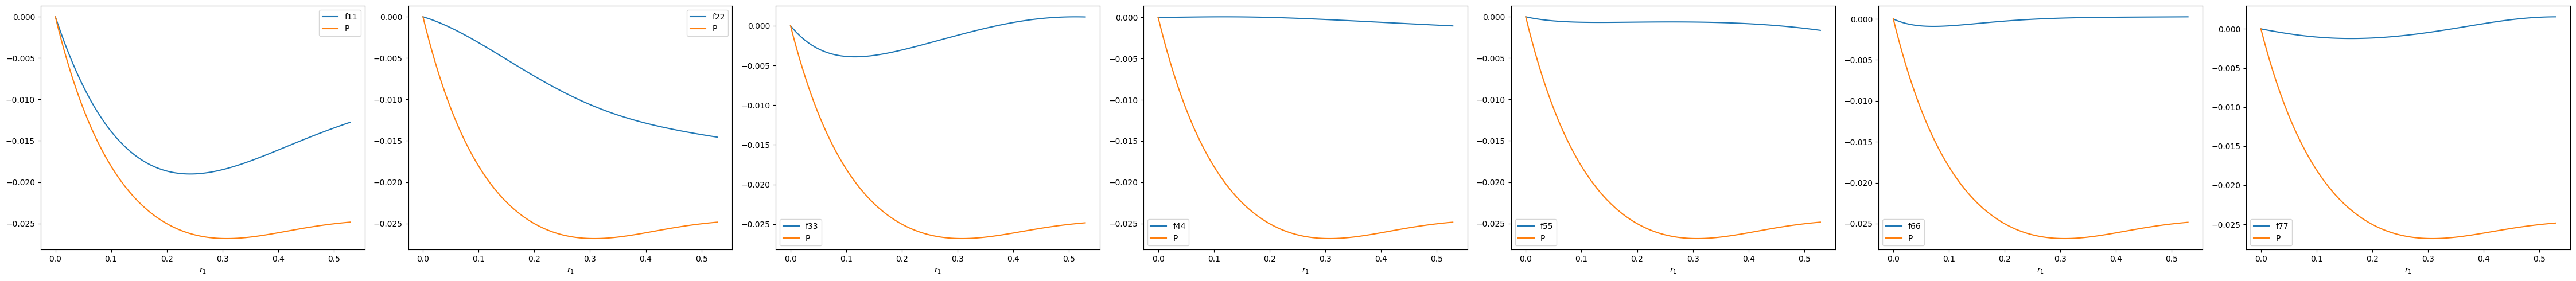

In [70]:
fig, axes = plt.subplots(1,7 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_2d, label='P')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# plt.savefig('plot.jpg')
# Show the plots
plt.show()

In [71]:
import pandas as pd

features = np.vstack([Coeff_1, Coeff_2, Coeff_3, Coeff_4, Coeff_5, Coeff_6, Coeff_7]).T
df = pd.DataFrame(features, columns=[f'Coeff_{i}' for i in range(1, 8)])

# Generate sample (100, 100) matrix
matrix = P_2d

# Add 'p' column, where each row is an array of the corresponding row in the matrix
df['p'] = [matrix[i, :] for i in range(matrix.shape[0])]

# Display the DataFrame
df

## This is what I was talking about in the paragraph of the Second approach

,Coeff_1,Coeff_2,Coeff_3,Coeff_4,Coeff_5,Coeff_6,Coeff_7,p
0,-0.797980,-0.959596,-0.353535,0.171717,0.030303,0.151515,-0.676768,"[0.0, 0.0011316909259859948, 0.002228077885566..."
1,-0.474747,-0.515152,0.818182,-0.434343,0.111111,-0.434343,-0.898990,"[0.0, 0.00032692989425430803, 0.00065735060527..."
2,0.010101,-0.575758,-0.070707,-0.373737,0.636364,-0.717172,-0.515152,"[0.0, 0.00018618979969245162, 0.00036415722364..."
3,-0.232323,-0.474747,0.575758,-0.030303,0.858586,-0.454545,-0.939394,"[0.0, 0.00012061875488019805, 0.00025113856106..."
4,0.292929,0.535354,0.797980,0.171717,0.555556,0.252525,0.333333,"[0.0, -0.0008277231416192979, -0.0016103354070..."
...,...,...,...,...,...,...,...,...
95,-0.212121,-0.595960,-0.474747,-0.070707,0.636364,-0.838384,-0.757576,"[0.0, 0.0006387958856311796, 0.001243649722350..."
96,-0.737374,-0.595960,-0.595960,-0.393939,0.232323,-0.373737,-0.555556,"[0.0, 0.0011920939237347813, 0.002330421694030..."
97,0.878788,-0.676768,0.070707,-0.858586,0.272727,-0.454545,-0.515152,"[0.0, -0.0008005481874142789, -0.0015646554641..."
98,-0.151515,0.858586,-0.151515,0.818182,-0.616162,0.515152,0.777778,"[0.0, 4.169856450883277e-05, 7.235534307556911..."


In [72]:
# Data Preprocessing

## Expand the P column into separate columns
p_expanded = pd.DataFrame(df['p'].to_list(), index=df.index)
p_expanded.columns = [f'p_{i}' for i in range(p_expanded.shape[1])]

# Combine the coefficients and the expanded P columns
df_new = pd.concat([df.drop(columns=['p']), p_expanded], axis=1)

In [73]:
df_new.head()  ## It gives first 5 samples along with labels. The P column where each P was an array of 100 elements, this P column is now expanded into 100 separate column

,Coeff_1,Coeff_2,Coeff_3,Coeff_4,Coeff_5,Coeff_6,Coeff_7,p_0,p_1,p_2,...,p_90,p_91,p_92,p_93,p_94,p_95,p_96,p_97,p_98,p_99
0,-0.797980,-0.959596,-0.353535,0.171717,0.030303,0.151515,-0.676768,0.0,0.001132,0.002228,...,0.023095,0.023020,0.022947,0.022879,0.022813,0.022751,0.022693,0.022639,0.022587,0.022540
1,-0.474747,-0.515152,0.818182,-0.434343,0.111111,-0.434343,-0.898990,0.0,0.000327,0.000657,...,0.013596,0.013556,0.013516,0.013476,0.013436,0.013396,0.013357,0.013319,0.013281,0.013243
2,0.010101,-0.575758,-0.070707,-0.373737,0.636364,-0.717172,-0.515152,0.0,0.000186,0.000364,...,0.006488,0.006492,0.006497,0.006502,0.006507,0.006512,0.006518,0.006525,0.006532,0.006539
3,-0.232323,-0.474747,0.575758,-0.030303,0.858586,-0.454545,-0.939394,0.0,0.000121,0.000251,...,0.008040,0.007989,0.007938,0.007887,0.007836,0.007784,0.007733,0.007682,0.007631,0.007580
4,0.292929,0.535354,0.797980,0.171717,0.555556,0.252525,0.333333,0.0,-0.000828,-0.001610,...,-0.011043,-0.011038,-0.011037,-0.011041,-0.011049,-0.011061,-0.011078,-0.011098,-0.011123,-0.011152


In [74]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_new = scaler.fit_transform(df_new)

# df_new = pd.DataFrame(df_new)

# The values in the feature matrix and label matrix (P) already lies between -1 to 1. So no need to transform data.

In [75]:
# Prepare the data for machine learning
X_features = df_new.iloc[:, :7].to_numpy()  # Coefficients
y_labels = df_new.iloc[:, 7:].to_numpy()    # Flattened P

In [76]:
print(X_features.shape)
print(y_labels.shape)

(100, 7)
(100, 100)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.3, random_state=42)

In [79]:
# Train the model
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
y_pred_RF = model_RF.predict(X_test)
mse = mean_squared_error(y_test, y_pred_RF)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.469180831221704e-06


## Using Neural Network

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [82]:
# Define the neural network model
model_NN = Sequential()
model_NN.add(Dense(32, input_dim=X_features.shape[1], activation='relu'))
model_NN.add(Dense(64, activation='relu'))
model_NN.add(Dense(32, activation='relu'))
model_NN.add(Dense(y_labels.shape[1]))  # Output layer

# Compile the model
model_NN.compile(optimizer=SGD(learning_rate=0.001), loss='mse')

In [83]:
# Summary of the model
model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 100)               3300      
                                                                 
Total params: 7748 (30.27 KB)
Trainable params: 7748 (30.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# Train the model
model_NN.fit(X_features, y_labels, epochs= 20, batch_size=10, validation_split=0.3)

Epoch 1/20
7/7 [==============================] - 1s 44ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 2/20
7/7 [==============================] - 0s 12ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 8/20
7/7 [==============================] - 0s 12ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 9/20
7/7 [==============================] - 0s 11ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 10/20
7/7 [==============================] - 0s 11ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 11/20
7/7 [==============

In [85]:
# Predicting using the trained model
y_pred_NN = model_NN.predict(X_test)

1/1 [==============================] - 0s 173ms/step


In [86]:
loss = model_NN.evaluate(X_test, y_test)
print(f"Loss: {loss}")

1/1 [==============================] - 0s 110ms/step - loss: 0.0046
Loss: 0.004591136239469051


In [87]:
mse = mean_squared_error(y_test, y_pred_NN)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.004591136518227422


In [88]:
y_test.shape

(30, 100)

The mean square error for Random Forest was in the range of $10^{-6}$ while for Neural Network, it is in the range of $10^{-3}$. The Random Forest comparitively gives better result as compare to Neural Network. Either the Neural Network is not a good algorithm for this problem or probably we have to change the architecture of Neural Network to get better results.

## Third Approach

In this approach I used Principle Component Analysis (PCA). It is an unsupervised learning algorithm. PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization. So we have a feature matrix of shape (100,7). Each feature can be identified as a vector with 7 components. Hence we define a seven dimensional vector space, in which all points (each with 7 components) have been located. The PCA identifies the princile axes of data, meaning it identifies the vectors around which the maximum data points are distributed and hence the variance is vey high about those vectors (also known as Principle Axes).The length of the vector is an indication of how "important" that axis is in describing the distribution of the data. Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance. .In this approach I reduced 7 dimensional data into 2 dimensional and hence found 2 principle axes (2 vectors with 7 components). I have considered those two sets of 7 coefficients as an initial guess and used first approach to find the best possible coefficcients.

In [89]:
X_features_new = df_new.iloc[:, :7]

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_features)

PCA(n_components=2)

In [91]:
print(pca.components_)
print(pca.explained_variance_) # It gives the length of the 2 vectors that are known as Principle Axes. The Variance is high about these 2 vectors(calculated by pca.components_).

[[-0.560535    0.11507012  0.49444566  0.27211134 -0.37690187 -0.44250502
  -0.12717144]
 [ 0.17654038  0.53485045  0.34122626  0.11541389 -0.34207222  0.55727718
   0.35417721]]
[0.44886546 0.42480668]


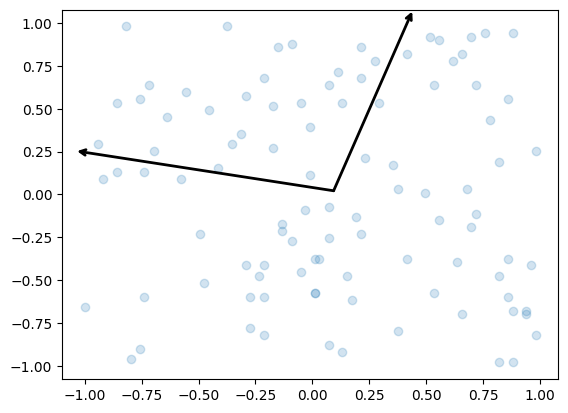

In [92]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', (v1[0],v1[1]) , (v0[0], v0[1]), arrowprops=arrowprops)

# plot data
plt.scatter(X_features[:, 0], X_features[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
# plt.axis('equal');

In [93]:
X_pca = pca.transform(X_features)
print("original shape:   ", X_features.shape)
print("transformed shape:", X_pca.shape)

original shape:    (100, 7)
transformed shape: (100, 2)


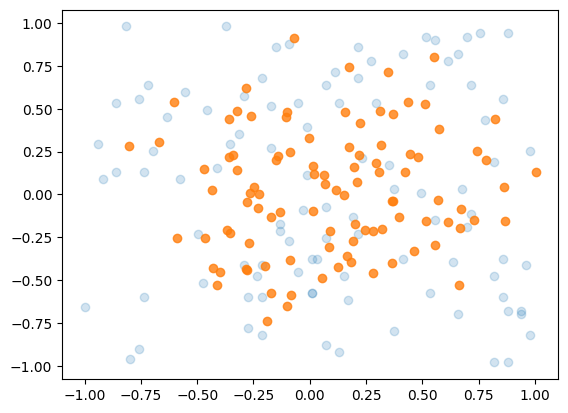

In [94]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_features[:, 0], X_features[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
# plt.axis('equal');

In [95]:
X_pca.shape

(100, 2)

Corresponding to the coefficients, I identified sampling function P using both Neural Network and Random Forest Regressor. I later compared it with actual sampling function P (as you will see below). The random Forest Regressor comparitively gives better results as compare to Neural Network.

In [96]:
P1_NN = model_NN.predict(pca.components_[0].reshape(1, -1))
P2_NN = model_NN.predict(pca.components_[1].reshape(1, -1))

P1_RF = model_RF.predict(pca.components_[0].reshape(1, -1))
P2_RF = model_RF.predict(pca.components_[1].reshape(1, -1))

1/1 [==============================] - 0s 21ms/step


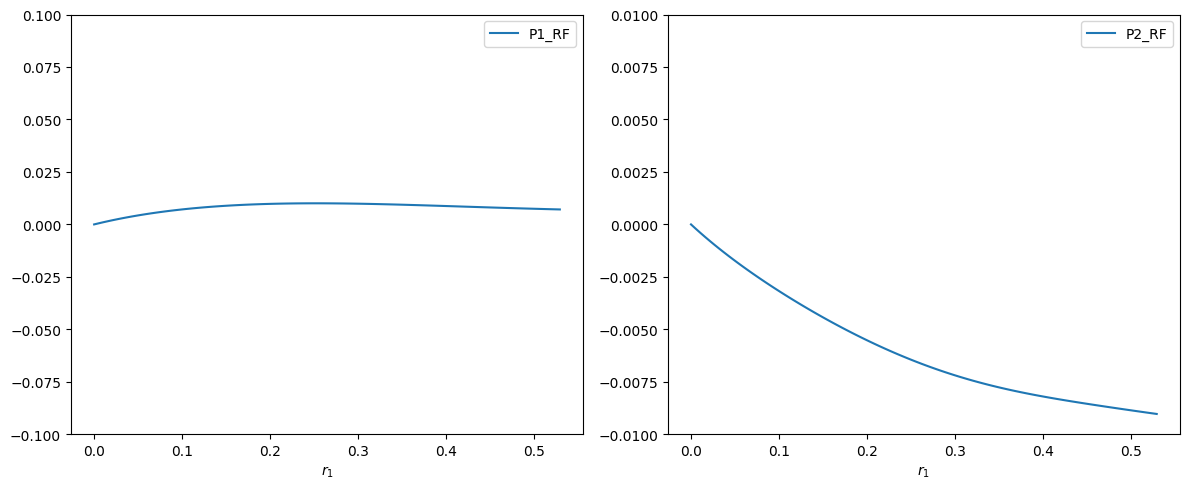

In [97]:
fig, (ax1,ax2) = plt.subplots(1,2 ,figsize=(12,5))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

P1_NN = P1_NN.reshape(-1)
P2_NN = P2_NN.reshape(-1)

P1_RF = P1_RF.reshape(-1)
P2_RF = P2_RF.reshape(-1)

ax1.plot(r1, P1_RF, label = 'P1_RF')
# ax1.plot(r1, P1_NN, label='P1_NN')
ax1.set_xlabel('$r_1$')
ax1.set_ylim(-0.1,0.1)
ax1.legend()

ax2.plot(r1, P2_RF, label = 'P2_RF')
# ax2.plot(r1, P2_NN, label='P2_NN')
ax2.set_xlabel('$r_1$')
ax2.set_ylim(-0.01,0.01)
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

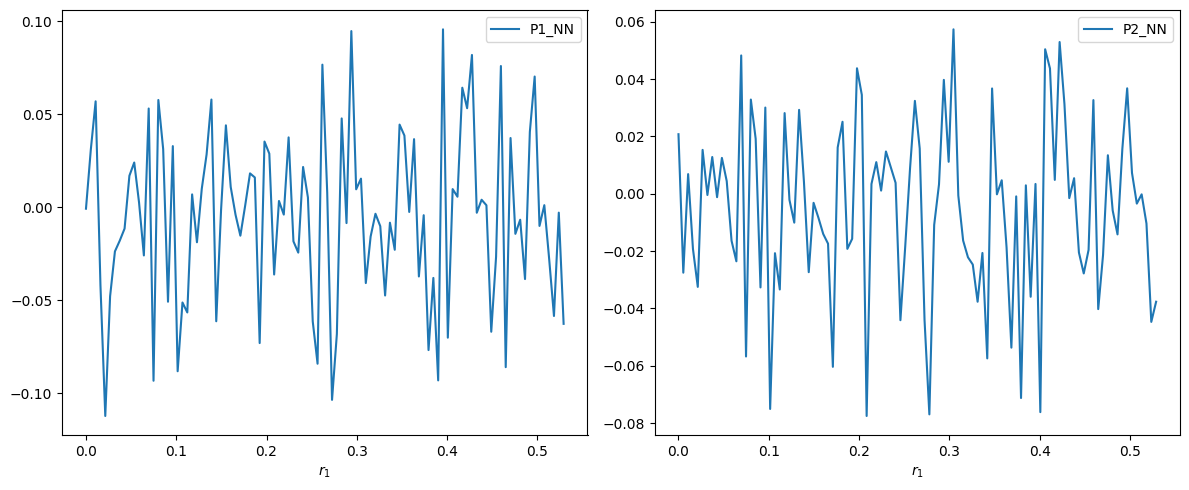

In [98]:
fig, (ax1,ax2) = plt.subplots(1,2 ,figsize=(12,5))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

P1_NN = P1_NN.reshape(-1)
P2_NN = P2_NN.reshape(-1)

P1_RF = P1_RF.reshape(-1)
P2_RF = P2_RF.reshape(-1)

# ax1.plot(r1, P1_RF, label = 'P1_RF')
ax1.plot(r1, P1_NN, label='P1_NN')
ax1.set_xlabel('$r_1$')
ax1.legend()

# ax2.plot(r1, P2_RF, label = 'P2_RF')
ax2.plot(r1, P2_NN, label='P2_NN')
ax2.set_xlabel('$r_1$')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [100]:
best_coefficients_1 = [-0.560535, 0.11507012, 0.49444566, 0.27211134, -0.37690187, -0.44250502, -0.12717144]
best_coefficients_2 = [0.17654038, 0.53485045, 0.34122626, 0.11541389, -0.34207222, 0.55727718, 0.35417721]

P1_actual = best_coefficients_1[0] * F_11_2d + best_coefficients_1[1] * F_22_2d + best_coefficients_1[2] * F_33_2d + best_coefficients_1[3] * F_44_2d + best_coefficients_1[4] * F_55_2d + best_coefficients_1[5] * F_66_2d + best_coefficients_1[6] * F_77_2d
P2_actual = best_coefficients_2[0] * F_11_2d + best_coefficients_2[1] * F_22_2d + best_coefficients_2[2] * F_33_2d + best_coefficients_2[3] * F_44_2d + best_coefficients_2[4] * F_55_2d + best_coefficients_2[5] * F_66_2d + best_coefficients_2[6] * F_77_2d

## Actual Sampling functions corresponding to the coefficients found using PCA algorithm

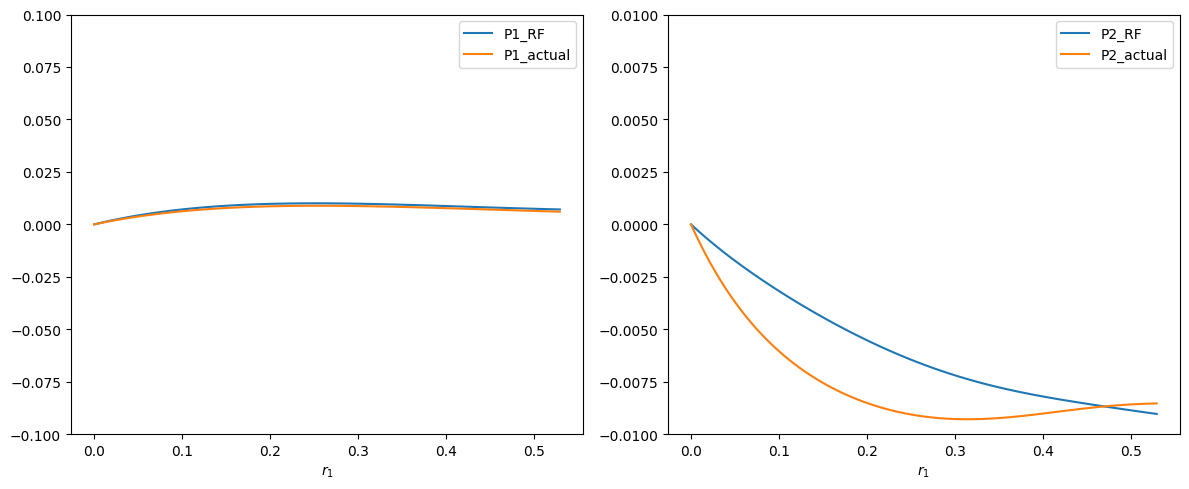

In [101]:
fig, (ax1,ax2) = plt.subplots(1,2 ,figsize=(12,5))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

P1_NN = P1_NN.reshape(-1)
P2_NN = P2_NN.reshape(-1)

P1_RF = P1_RF.reshape(-1)
P2_RF = P2_RF.reshape(-1)

ax1.plot(r1, P1_RF, label = 'P1_RF')
ax1.plot(r1, P1_actual, label='P1_actual')
ax1.set_xlabel('$r_1$')
ax1.set_ylim(-0.1,0.1)
ax1.legend()

ax2.plot(r1, P2_RF, label = 'P2_RF')
ax2.plot(r1, P2_actual, label='P2_actual')
ax2.set_xlabel('$r_1$')
ax2.set_ylim(-0.01,0.01)
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

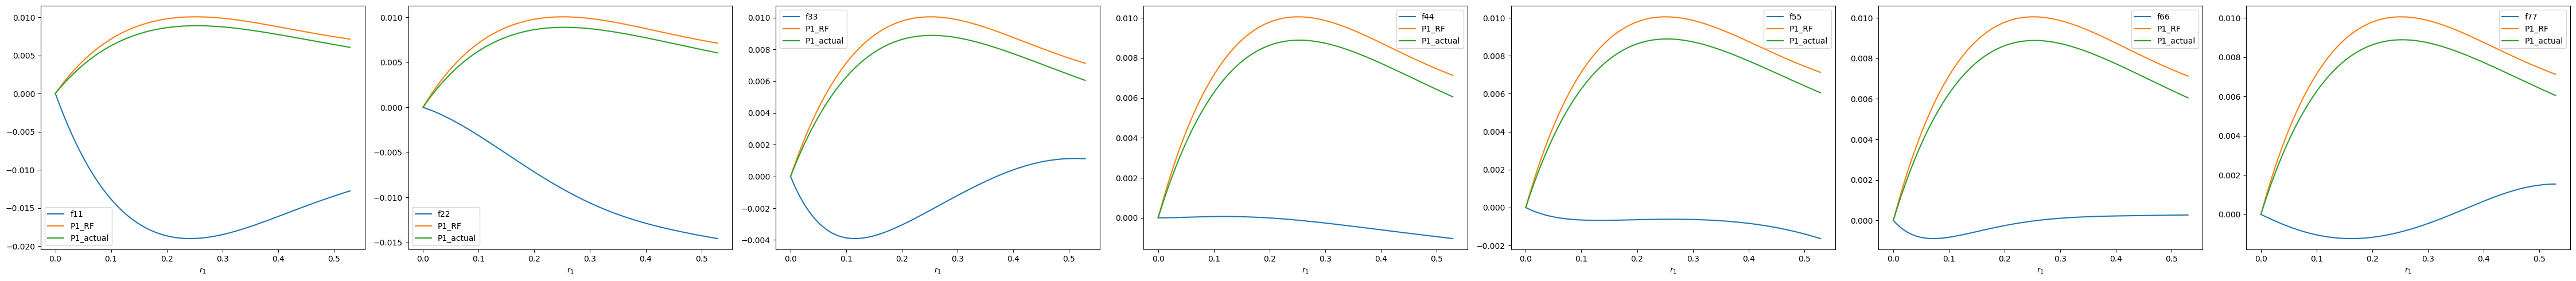

In [102]:
fig, axes = plt.subplots(1,7 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, P1_RF, label='P1_RF')
    ax.plot(r1, P1_actual, label='P1_actual')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# plt.savefig('plot.jpg')
# Show the plots
plt.show()

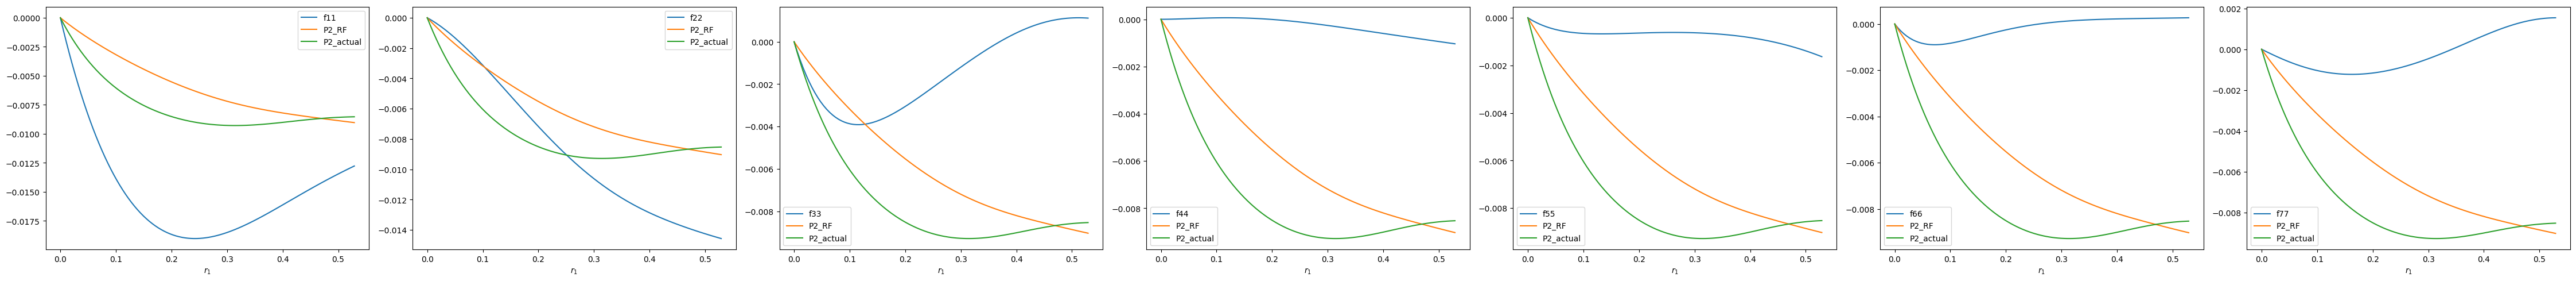

In [103]:
fig, axes = plt.subplots(1,7 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, P2_RF, label='P2_RF')
    ax.plot(r1, P2_actual, label='P2_actual')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# plt.savefig('plot.jpg')
# Show the plots
plt.show()

Now using the first approach to find best possible coefficients.

In [104]:
coefficients_1 = tf.Variable([-0.560535, 0.11507012, 0.49444566, 0.27211134, -0.37690187, -0.44250502, -0.12717144], dtype=tf.float32)
coefficients_2 = tf.Variable([0.17654038, 0.53485045, 0.34122626, 0.11541389, -0.34207222, 0.55727718, 0.35417721], dtype=tf.float32)

In [105]:
# Define the sampling function p
def sampling_function_1(coefficients_1, f):
    p = sum(coefficients_1[i] * f[i] for i in range(7))
    return p


# Define the custom loss function
def variance_loss(f, p):
    loss = 0
    for i in range(7):
        ratio = f[i] / (p + 1e-6)

        mask_f_ii_p = tf.math.logical_not(tf.math.is_nan(ratio)) & tf.math.logical_not(tf.math.is_inf(ratio))
        ratio_new = tf.boolean_mask(ratio, mask_f_ii_p)

        variance = tf.math.reduce_variance(ratio_new)
        loss += variance

    return loss

In [106]:
# Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_1():
    with tf.GradientTape() as tape:
        p = sampling_function_1(coefficients_1, f)
        loss = variance_loss(f, p)
    gradients = tape.gradient(loss, [coefficients_1])
    clipped_gradients = [tf.clip_by_value(grad, -1.0, 1.0) for grad in gradients]
    optimizer.apply_gradients(zip(gradients, [coefficients_1]))
    return loss

In [107]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss = train_step_1()
    if epoch % 100 == 0:

      print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 0.5914655923843384
Epoch 100, Loss: 0.10195218771696091
Epoch 200, Loss: 0.07313362509012222
Epoch 300, Loss: 0.06003139540553093
Epoch 400, Loss: 0.052135203033685684
Epoch 500, Loss: 0.04671308025717735
Epoch 600, Loss: 0.04269448667764664
Epoch 700, Loss: 0.03956233710050583
Epoch 800, Loss: 0.037032194435596466
Epoch 900, Loss: 0.03493292257189751


In [108]:
# Best coefficients
best_coefficients_1 = coefficients_1.numpy()
print("Best coefficients:", best_coefficients_1)

Best coefficients: [-1.6106797  -0.51407623  0.3692061   0.24117588 -0.45157498 -0.47790903
 -0.11544471]


In [109]:
# Define the sampling function p
def sampling_function_2(coefficients_2, f):
    p = sum(coefficients_2[i] * f[i] for i in range(7))
    return p


# Define the custom loss function
def variance_loss(f, p):
    loss = 0
    for i in range(7):
        ratio = f[i] / (p + 1e-6)

        mask_f_ii_p = tf.math.logical_not(tf.math.is_nan(ratio)) & tf.math.logical_not(tf.math.is_inf(ratio))
        ratio_new = tf.boolean_mask(ratio, mask_f_ii_p)

        variance = tf.math.reduce_variance(ratio_new)
        loss += variance

    return loss

In [110]:
# Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_2():
    with tf.GradientTape() as tape:
        p = sampling_function_2(coefficients_2, f)
        loss = variance_loss(f, p)
    gradients = tape.gradient(loss, [coefficients_2])
    clipped_gradients = [tf.clip_by_value(grad, -1.0, 1.0) for grad in gradients]
    optimizer.apply_gradients(zip(gradients, [coefficients_2]))
    return loss

In [111]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    loss = train_step_2()
    if epoch % 100 == 0:

      print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 0.44728225469589233
Epoch 100, Loss: 0.10165140777826309
Epoch 200, Loss: 0.07305143028497696
Epoch 300, Loss: 0.059992529451847076
Epoch 400, Loss: 0.05211181193590164
Epoch 500, Loss: 0.04669694975018501
Epoch 600, Loss: 0.04268234223127365
Epoch 700, Loss: 0.03955261781811714
Epoch 800, Loss: 0.03702407330274582
Epoch 900, Loss: 0.034925952553749084


In [112]:
# Best coefficients
best_coefficients_2 = coefficients_2.numpy()
print("Best coefficients:", best_coefficients_2)

Best coefficients: [ 1.229037    1.0510862   0.5123205   0.13533759 -0.27691847  0.60036427
  0.37025344]


In [113]:
P1 = best_coefficients_1[0] * F_11_2d + best_coefficients_1[1] * F_22_2d + best_coefficients_1[2] * F_33_2d + best_coefficients_1[3] * F_44_2d + best_coefficients_1[4] * F_55_2d + best_coefficients_1[5] * F_66_2d + best_coefficients_1[6] * F_77_2d

P2 = best_coefficients_2[0] * F_11_2d + best_coefficients_2[1] * F_22_2d + best_coefficients_2[2] * F_33_2d + best_coefficients_2[3] * F_44_2d + best_coefficients_2[4] * F_55_2d + best_coefficients_2[5] * F_66_2d + best_coefficients_2[6] * F_77_2d

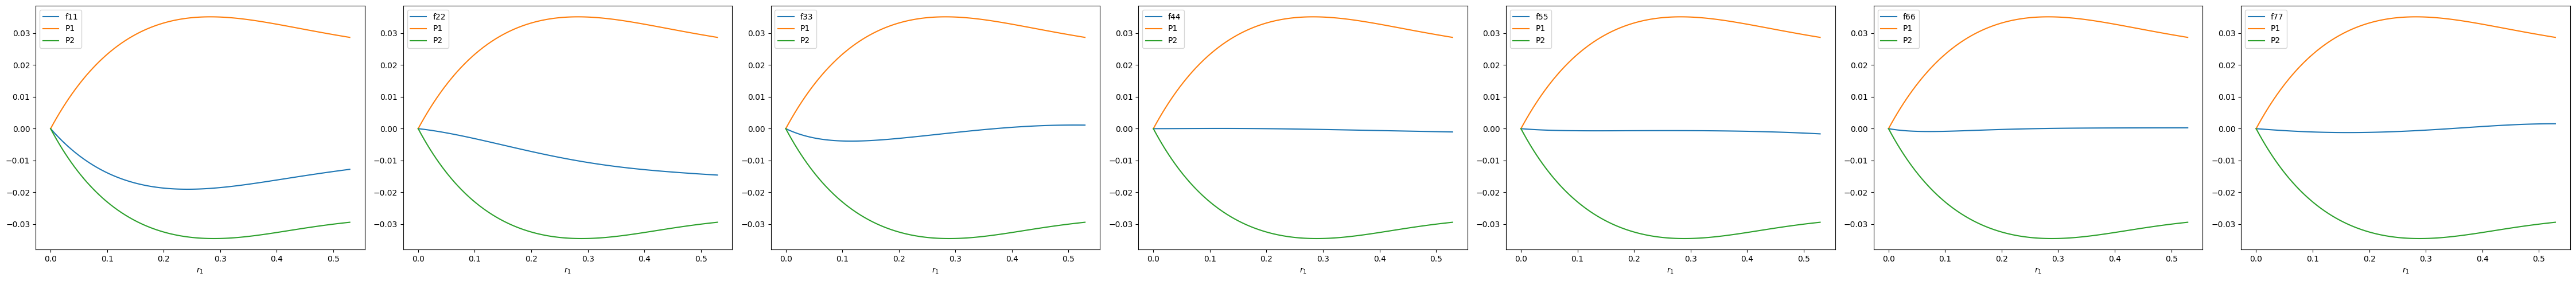

In [114]:
fig, axes = plt.subplots(1,7 ,figsize=(45,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label = titles[i])
    ax.plot(r1, P1, label='P1')
    ax.plot(r1, P2, label='P2')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# plt.savefig('plot.jpg')
# Show the plots
plt.show()